# Making Concatenated Composite Images
In this notebook we are making overviews of the development of the structures used for analysis. To this extent we take the images from the individual time points and turn them into collages as well as an overview image. First we load all of the sequences which have all timepoints availible:

In [1]:
import organoid_prediction_python as opp
import skimage.io as io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"
image_folder = home_directory + "/image_data/Processed Data/Composites_Scaled_Across_Timepoints/"

all_files = sorted(os.listdir(image_folder))

filenames_unique_id = sorted(list(set([file[:-11] for file in all_files])))
sequences = []
sequence_names = []
for name in filenames_unique_id:
    seq = [io.imread(image_folder + file) for file in all_files if name in file]
    if len(seq)>=3:
        sequences.append(seq)
        sequence_names.append(name[:-1])
        
sequences = np.array(sequences)[:,:,:,:,:3]
sequences.shape

(576, 3, 350, 350, 3)

Now we concatenate them along the X axis

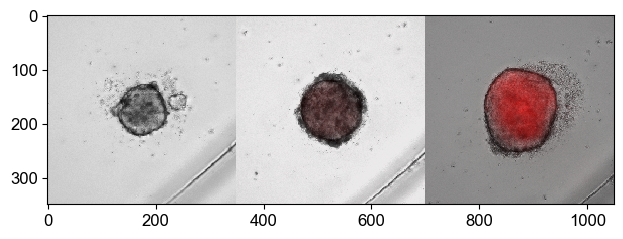

In [2]:
concatenated_seqs = np.array([np.concatenate(seq,axis=1) for seq in sequences])
io.imshow(concatenated_seqs[0])

Saving for individual use

In [3]:
out_folder = home_directory + "/image_data/Processed Data/Composites_concatenated/"
if not os.path.isdir(out_folder):
    os.mkdir(out_folder)

for name,image in zip(sequence_names,concatenated_seqs):
    io.imsave(out_folder+name+"concat.tif", image)
    

Now we can make an overview image containing all the structures:

In [6]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

mpl.rcParams['figure.dpi'] = 900

fontprops = fm.FontProperties(size=1)

pixel_size = 2.7493

fi,axs = plt.subplots(48,12,figsize = (20,30))
for i,image in enumerate(concatenated_seqs):
    axs[int(i/12),i%12].imshow(image,extent=[0,image.shape[1]*pixel_size,0,image.shape[0]*pixel_size])
    axs[int(i/12),i%12].set_xticks([])
    axs[int(i/12),i%12].set_yticks([])
    scalebar = AnchoredSizeBar(axs[int(i/12),i%12].transData,
                       200,None, 'lower right', 
                       pad=0.5,
                       color='white',
                       frameon=False,
                       size_vertical=10,
                       fontproperties=fontprops)

    axs[int(i/12),i%12].add_artist(scalebar)
plt.tight_layout(pad =0.5)

plt.savefig(f"{out_folder}/Composites Overview Scale Bar 200 um).pdf", format="pdf", bbox_inches="tight")
plt.close()